In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, BatchNormalization
import torch
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [1]:
%pwd

'C:\\workspace\\jupyter_AI_Data_Lab\\INNOFACE'

In [7]:
import crop

tempy = crop.Image_Crop(yolo_path='./data/epoch_4_facedetectionmodel.pt',
                       model_path='./data/stratify_dataset_light_cnn.h5')


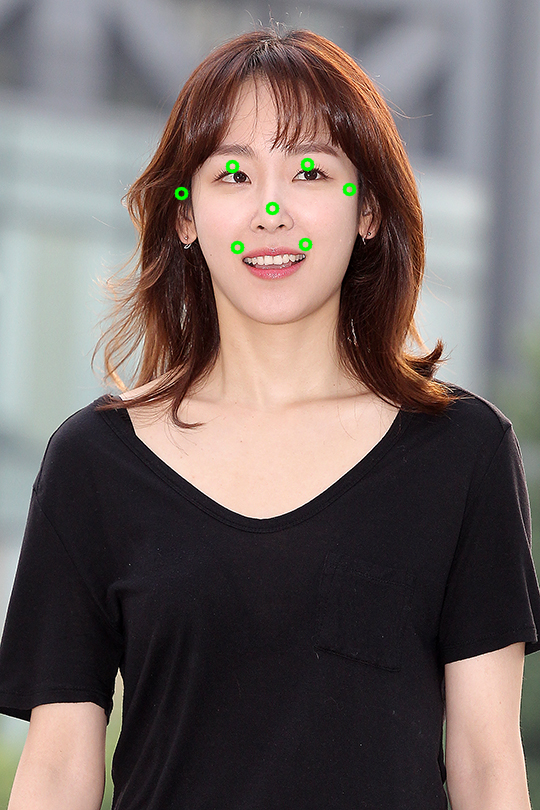

In [10]:
from PIL import Image

img = plt.imread('C:\\workspace\\jupyter_AI_Data_Lab\\INNOFACE\\data\\서현진3.jpg')

tempy1 = tempy.for_cam(img)
Image.fromarray(tempy1)

In [10]:
image

array([[[135, 138, 145],
        [137, 140, 147],
        [140, 142, 154],
        ...,
        [165, 167, 179],
        [165, 167, 180],
        [165, 169, 180]],

       [[135, 135, 143],
        [134, 137, 146],
        [136, 140, 151],
        ...,
        [163, 165, 177],
        [164, 166, 179],
        [165, 167, 179]],

       [[135, 135, 145],
        [133, 137, 146],
        [134, 138, 149],
        ...,
        [165, 165, 177],
        [168, 167, 181],
        [165, 167, 179]],

       ...,

       [[243, 238, 218],
        [153, 111,  89],
        [156, 106,  79],
        ...,
        [120,  68,  44],
        [122,  67,  46],
        [130,  70,  42]],

       [[230, 232, 211],
        [142, 105,  78],
        [157, 106,  77],
        ...,
        [131,  79,  55],
        [128,  74,  50],
        [127,  63,  35]],

       [[213, 197, 184],
        [145, 101,  72],
        [172, 113,  81],
        ...,
        [129,  73,  48],
        [130,  73,  46],
        [134,  69,  47]]

In [3]:
'''
Torch Hub
'''

# yolo = torch.hub.load('ultralytics/yolov5','custom', path='C:/hoon/data/epoch_4_facedetectionmodel.pt',force_reload=True)  # local model
yolo = torch.load('C:/hoon/data/epoch_4_facedetectionmodel.pt')

In [4]:
result = yolo(plt.imread('C:/hoon/data/서현진3.jpg'),augment=True)
a=result.crop()
b=result.pandas().xyxy[0]
img = cv2.cvtColor(a[0]['im'], cv2.COLOR_BGR2RGB)
print(a[0]['box'])
plt.imshow(img)

[tensor(144.58806), tensor(52.40191), tensor(399.07468), tensor(339.14957)]


: 

: 

In [5]:
img_path = 'C:/hoon/data/서현진3.jpg'
# plt.imshow(plt.imread(img_path))

result = yolo(plt.imread(img_path),augment=True)
a=result.crop()
x,y,w,h, = int(a[0]['box'][0]), int(a[0]['box'][1]), int(a[0]['box'][2]), int(a[0]['box'][3])
img = plt.imread(img_path)[y:y+(h-y), x:x+(w-x)]
# plt.imshow(img)
original_size = img.shape

[[273 135 211 211]]


C:\Users\user\AppData\Local\Temp/ipykernel_8680/2901312904.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


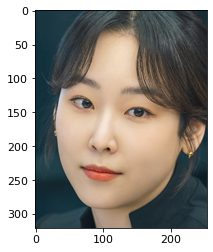

In [104]:
# import cv2
# import sys
# import matplotlib.pyplot as plt
# # 사용자 입력
# # imagePath = 'C:/hoon/image_gt/KakaoTalk_20220531_150309800_05.jpg'
# imagePath = 'C:/hoon/data/현진(not_crop).jpg'
# # # cascPath = sys.argv[2] 
# cascPath = "C:/hoon/haarcascade_frontalface_default.xml"
# # # Create the haar cascade
# faceCascade = cv2.CascadeClassifier(cascPath)


# # image = cv2.imread(imagePath)
# image = plt.imread(imagePath)
# plt.imshow(image)
# plt.show()
# # image = cv2.resize(image, (512,512))
# # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# faces = faceCascade.detectMultiScale(image,scaleFactor=1.1, # 이미지에서 얼굴 크기가 서로 다른 것을 보상해주는 값      
#                                     minNeighbors=5,  # 얼굴 사이의 최소 간격(픽셀)입니다    
#                                     minSize=(30, 30),)# 검출된 얼굴 주변에 사각형 그리기
# x,y,w,h = faces[-1]
# print(faces)

# # img = image[int(y):int((y+h)),  int(x):int((x+w))]
# img = image[int(y*0.5):int((y+h*1.2)),  int(x):int((x+w*1.2))]
# # view_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)



In [10]:
img_size = 256
# image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = cv2.resize(img, (img_size, img_size))
image = image.reshape((1,img_size,img_size,3))
image = image/255.

pred = model.predict(image)[0]
image = image.reshape((256,256,3))
for i in range(0,14,2):
    cv2.circle(img, (int(pred[i]*original_size[1]/256),int(pred[i+1] *original_size[0]/256)), 5, (0,255,0), 2, cv2.LINE_AA)
plt.imshow(img)

1/1 [==============================] - 0s 72ms/step


: 

: 

In [9]:
pred

array([     128.29,      140.46,      89.331,      108.58,      165.29,      103.92,      95.668,      183.21,      165.75,      178.18,       44.77,      145.24,       213.9,      138.92], dtype=float32)

In [7]:
import tensorflow as tf
from tensorflow import keras

def NME(y_true,y_pred):
  w = 256
  h = 256
  d = (w**2+h**2)**(1/2)
  
  nose_x = y_true[:,0]
  nose_x_pred = y_pred[:,0]
  nose_y = y_true[:,1]
  nose_y_pred = y_pred[:,1]
  distance_nose = (tf.math.sqrt((nose_x_pred - nose_x)**2 + (nose_y_pred - nose_y)**2))/d
  left_eye_x = y_true[:,2]
  left_eye_x_pred = y_pred[:,2]
  left_eye_y = y_true[:,3]
  left_eye_y_pred = y_pred[:,3]
  distance_left_eye = (tf.math.sqrt((left_eye_x_pred - left_eye_x)**2 + (left_eye_y_pred - left_eye_y)**2))/d
  right_eye_x = y_true[:,4]
  right_eye_x_pred = y_pred[:,4]
  right_eye_y = y_true[:,5]
  right_eye_y_pred = y_pred[:,5]
  distance_right_eye = (tf.math.sqrt((right_eye_x_pred - right_eye_x)**2 + (right_eye_y_pred - right_eye_y)**2))/d
  left_mouse_x = y_true[:,6]
  left_mouse_x_pred = y_pred[:,6]
  left_mouse_y = y_true[:,7]
  left_mouse_y_pred = y_pred[:,7]
  distance_left_mouse = (tf.math.sqrt((left_mouse_x_pred - left_mouse_x)**2 + (left_mouse_y_pred - left_mouse_y)**2))/d
  right_mouse_x = y_true[:,8]
  right_mouse_x_pred = y_pred[:,8]
  right_mouse_y = y_true[:,9]
  right_mouse_y_pred = y_pred[:,9]
  distance_right_mouse = (tf.math.sqrt((right_mouse_x_pred - right_mouse_x)**2 + (right_mouse_y_pred - right_mouse_y)**2))/d
  left_ear_x = y_true[:,10]
  left_ear_x_pred = y_pred[:,10]
  left_ear_y = y_true[:,11]
  left_ear_y_pred = y_pred[:,11]
  distance_left_ear = (tf.math.sqrt((left_ear_x_pred - left_ear_x)**2 + (left_ear_y_pred - left_ear_y)**2))/d
  right_ear_x = y_true[:,12]
  right_ear_x_pred = y_pred[:,12]
  right_ear_y = y_true[:,13]
  right_ear_y_pred = y_pred[:,13]
  distance_right_ear = (tf.math.sqrt((right_ear_x_pred - right_ear_x)**2 + (right_ear_y_pred - right_ear_y)**2))/d
  
  nme = (tf.reduce_mean(distance_right_ear) + tf.reduce_mean(distance_left_ear) +  tf.reduce_mean(distance_right_mouse) + tf.reduce_mean(distance_left_mouse) + tf.reduce_mean(distance_right_eye) + tf.reduce_mean(distance_left_eye) + tf.reduce_mean(distance_nose))
#   nme = tf.reduce_mean(distance_nose + distance_left_eye + distance_right_eye + distance_left_mouse + distance_right_mouse + distance_left_ear + distance_right_ear)
  return nme

custom_obj = { 'NME' : NME }
# model = keras.models.load_model('//172.30.1.8/데이터사업추진팀/01. 프로젝트/12. NIPA AI 바우처/2022/03_동서한의원/Code/진유훈/model')
model = keras.models.load_model('//172.30.1.8/데이터사업추진팀/01. 프로젝트/12. NIPA AI 바우처/2022/03_동서한의원/Code/진유훈/model/stratify_dataset_cnn.h5', custom_objects = custom_obj)

In [4]:
cap = cv2.VideoCapture(0)
img_size = 256
faceCascade = cv2.CascadeClassifier("C:/hoon/haarcascade_frontalface_default.xml")
color = (0,255,0)

while cap.read()[0]:
    image = cap.read()[1]
    try:
        faces = faceCascade.detectMultiScale(image,scaleFactor=1.1, # 이미지에서 얼굴 크기가 서로 다른 것을 보상해주는 값      
                                        minNeighbors=5,  # 얼굴 사이의 최소 간격(픽셀)입니다    
                                        minSize=(100, 100),)# 검출된 얼굴 주변에 사각형 그리기
        y,x,w,h = faces[0]

        image = image[int(x):int((x+w)),  int(y):int((y+h)*1.1)]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (img_size, img_size))
        image = image.reshape((1,img_size,img_size,3))
        image = image/255.
        
        # pred = model.predict(image)[0]
        # print(pred)
        # for i in pred(0,14,2):
        #     cv2.circle(image, (int(i),int(i+1)), 2, color, 1, cv2.LINE_AA)
        
    except:
        pass
    cv2.imshow('MediaPipe Face Mesh(Puleugo)', image)
    
    if cv2.waitKey(5) & 0xFF == 27:
        break
    
cv2.destroyAllWindows()   
cap.release()

1/1 [==============================] - 0s 192ms/step
[-223.81386  -268.56183  -140.00546  -198.70439  -202.38531  -157.56508
  -51.075695 -272.10834  -260.2514   -286.22125   -61.476116 -287.2649
 -417.76276  -171.46643 ]


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:124: error: (-215:Assertion failed) bmi && width >= 0 && height >= 0 && (bpp == 8 || bpp == 24 || bpp == 32) in function 'FillBitmapInfo'


: 

In [1]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('./data/stratify_dataset_light_cnn.h5') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

OSError: SavedModel file does not exist at: ./data/stratify_dataset_light_cnn.h5/{saved_model.pbtxt|saved_model.pb}